# Задание 5. Разностный метод решения краевой задачи для обыкновенного дифференциального уравнения второго порядка. Мето прогонки

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable, List, Tuple, Any, Dict

# Параметры подобраны так, чтобы в МОЕМ!!! VSCode смотрелось хорошо.
plt.rcParams.update(
    {
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "lightgray",
        "axes.facecolor": "#151515",
        "axes.edgecolor": "#A2A2A2",
        "axes.labelcolor": "white",
        "axes.prop_cycle": plt.cycler('color', ['#00BBF9', '#FEE440', '#00F5D4', '#F15BB5', '#9B5DE5', '#1f77b4', '#ff7f0e', '#2ca02c',
            '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "#A2A2A2",
        "figure.facecolor": "#151515",
        "figure.edgecolor": "#A2A2A2",
        "savefig.facecolor": "#FFFFFF",
        "savefig.edgecolor": "black"
    }
)

### Вариант 12:

$$-\frac{7+x}{8-3x}u'' + \left(1-\frac{x}{3}\right)u' + \frac{1}{3}\ln(3+x)u = \frac{1+x}{2}$$

$$u'(-1)-3u(-1)=u'(1)=0$$

In [2]:
P = lambda x: (7 + x) / (8 - 3 * x)
Q = lambda x: 1 - x / 3
R = lambda x: 1 / 3 * np.log(3 + x)
F = lambda x: (1 + x) / 2

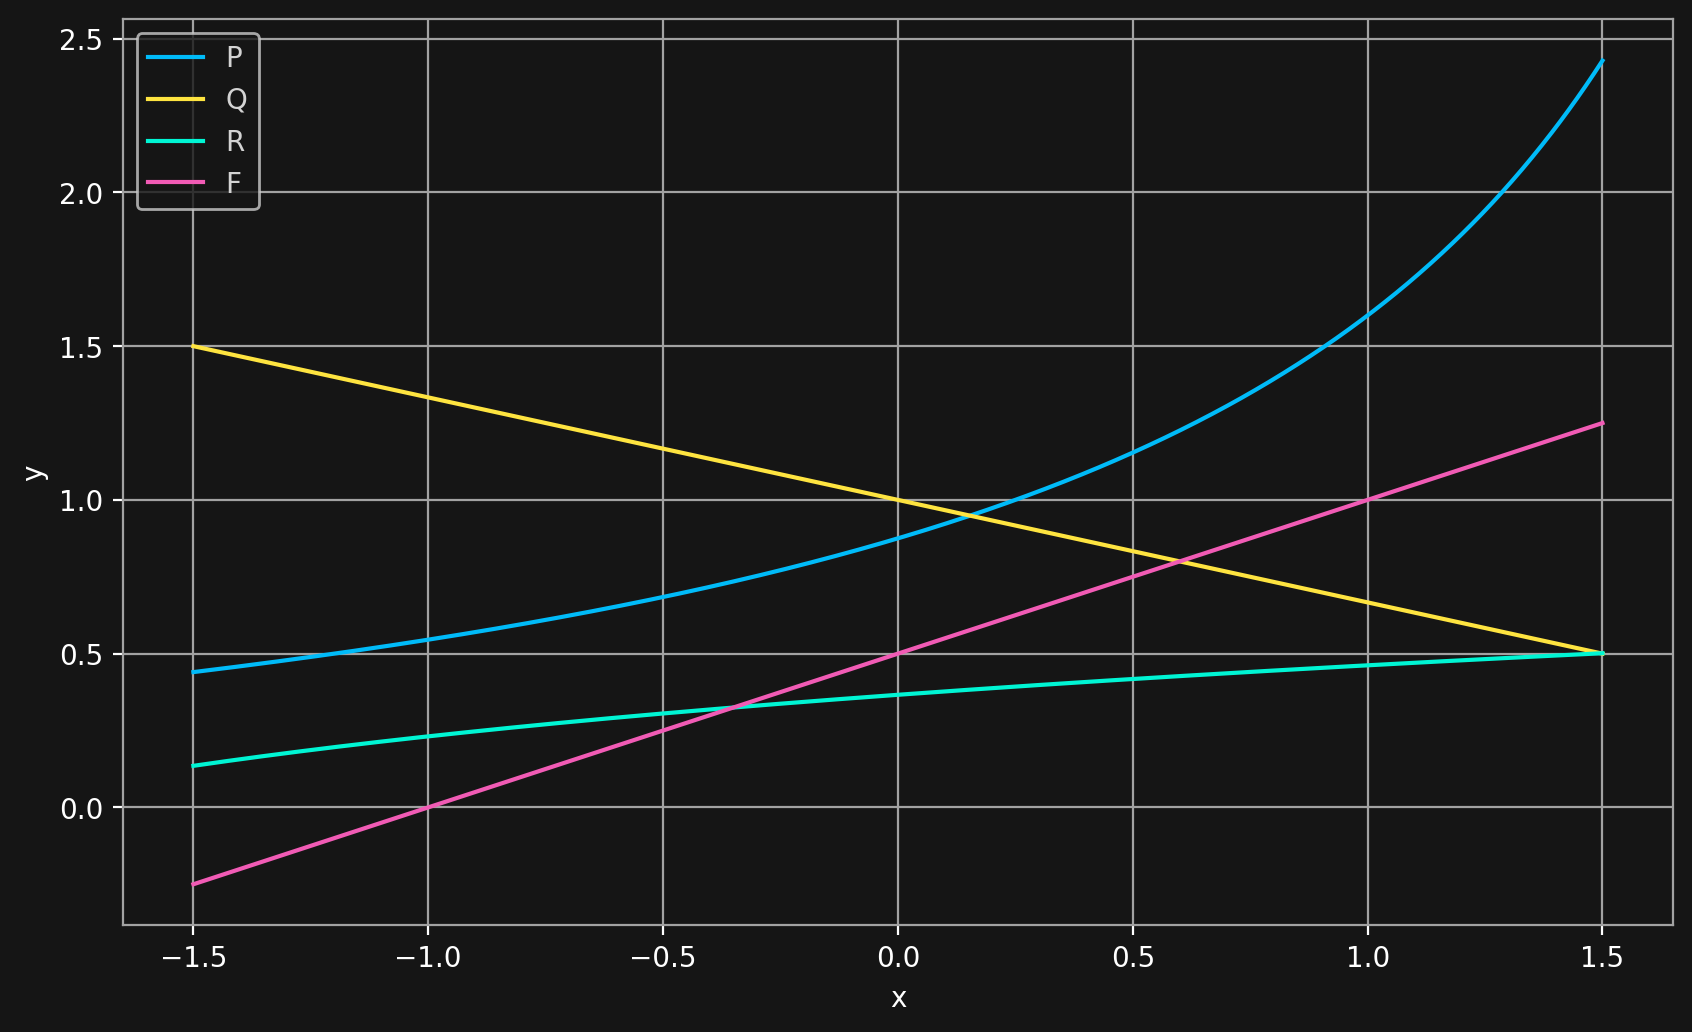

In [36]:
pts = 1000
X = np.linspace(-1.5, 1.5, pts)
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.plot(X, P(X), label='P')
ax.plot(X, Q(X), label='Q')
ax.plot(X, R(X), label='R')
ax.plot(X, F(X), label='F')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [27]:
a, b = -1, 1
alpha_1, alpha_2, beta_1, beta_2 = 1, 3, 1, 0
n = 10
X_ = np.linspace(a, b, n+1)
data = {
    'X': X_,
    'P': P(X_),
    'Q': Q(X_),
    'R': R(X_),
    'F': F(X_)
}
pd.DataFrame(data).transpose()

,0,1,2,3,4,5,6,7,8,9,10
X,-1.000000,-0.800000,-0.600000,-0.400000,-0.200000,0.000000,0.200000,0.400000,0.600000,0.800000,1.000000
P,0.545455,0.596154,0.653061,0.717391,0.790698,0.875000,0.972973,1.088235,1.225806,1.392857,1.600000
Q,1.333333,1.266667,1.200000,1.133333,1.066667,1.000000,0.933333,0.866667,0.800000,0.733333,0.666667
R,0.231049,0.262819,0.291823,0.318504,0.343206,0.366204,0.387717,0.407925,0.426978,0.445000,0.462098
F,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000


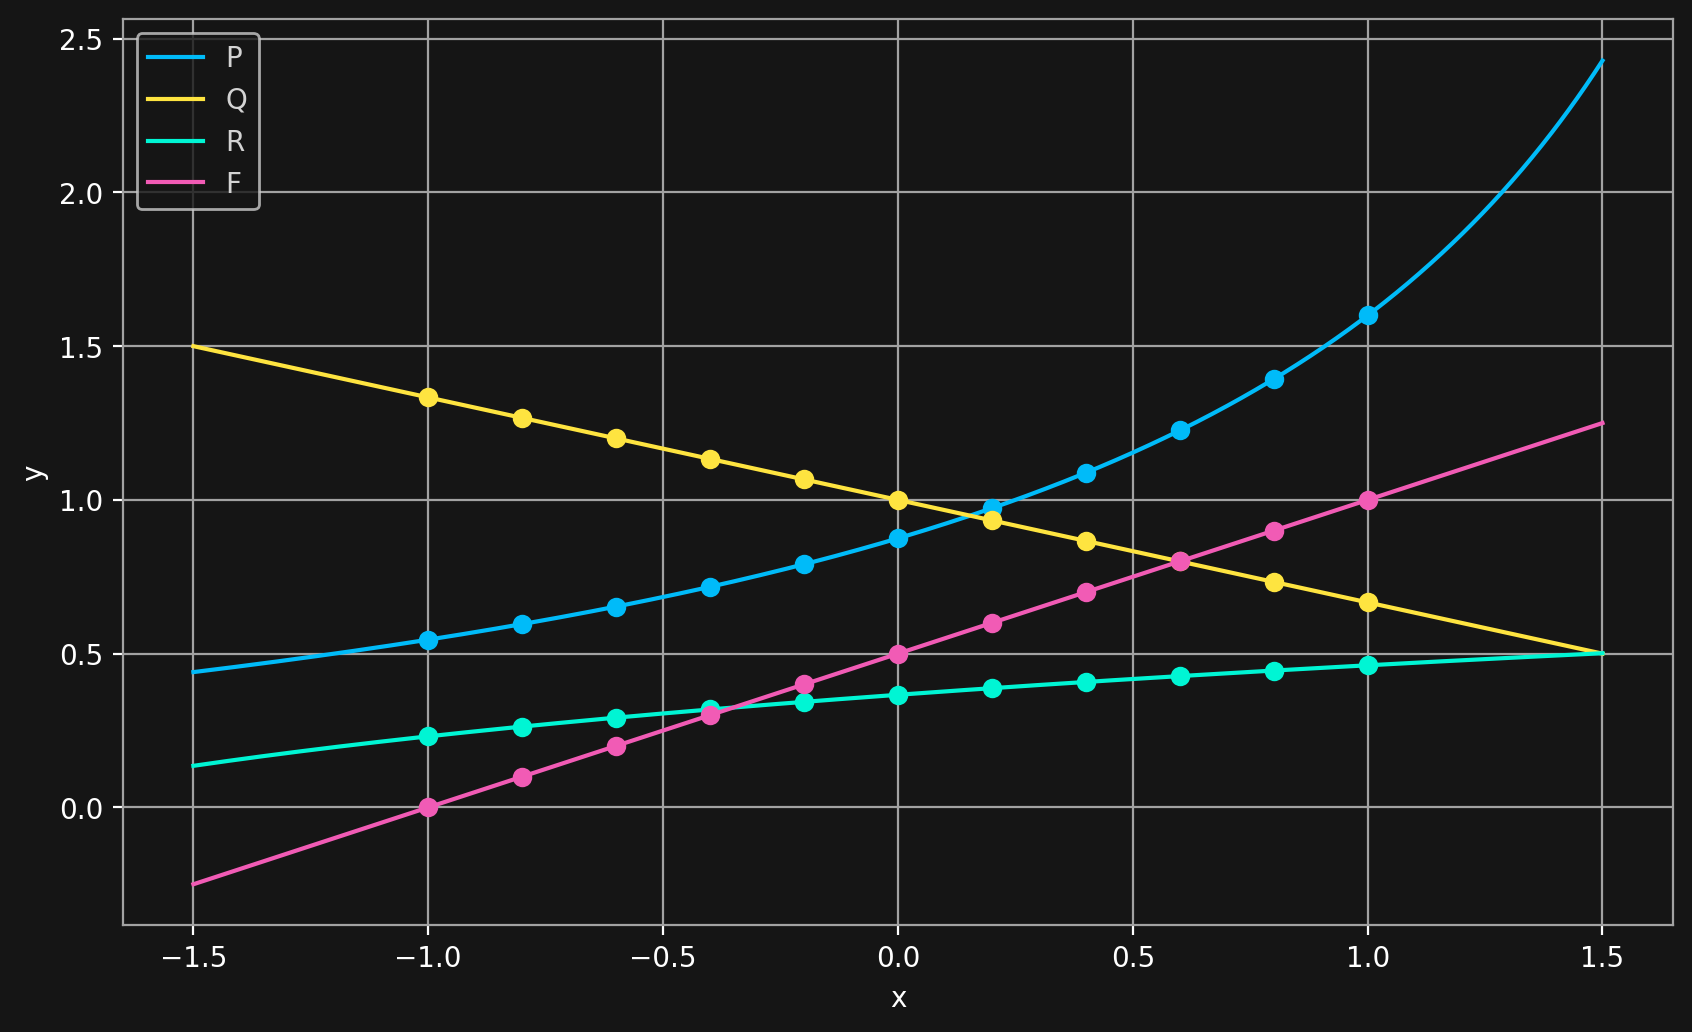

In [12]:
pts = 1000
X = np.linspace(-1.5, 1.5, pts)
z = {'P': 2, 'Q': 3, 'R': 4, 'F': 5}
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.plot(X, P(X), label='P', zorder=z['P'])
ax.plot(X, Q(X), label='Q', zorder=z['Q'])
ax.plot(X, R(X), label='R', zorder=z['R'])
ax.plot(X, F(X), label='F', zorder=z['F'])
for key in z:
    ax.scatter(data['X'], data[key], zorder=z[key])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [26]:
def coeffs_1(
    X: List[float] = data['X'],
    a1: float = alpha_1,
    b1: float = beta_1,
    a: int = a,
    b: int = b,
) -> Dict[str, List[float]]:
    n = len(X)
    h = X[1] - X[0]
    A, B, C, G = [0] * n, [0] * n, [0] * n, [0] * n

    A[0] = 0
    A[n - 1] = 0
    B[0] = h * a1
    B[n - 1] = h * b1
    C[0] = 0
    C[n - 1] = 0
    G[0] = -h * a
    G[n - 1] = -h * b

    for i in range(1, n-1):
        A[i] = -P(X[i]) - Q(X[i]) * h / 2
        C[i] = -P(X[i]) + Q(X[i]) * h / 2
        B[i] = A[i] + C[i] - h * h * R(X[i])
        G[i] = h * h * F(X[i])
    
    return {'A': A, 'B': B, 'C': C, 'G': G}

coeffs_1 = coeffs_1()
pd.DataFrame(coeffs_1).transpose()

,0,1,2,3,4,5,6,7,8,9,10
A,0.0,-0.722821,-0.773061,-0.830725,-0.897364,-0.975000,-1.066306,-1.174902,-1.305806,-1.466190,0.0
B,0.2,-1.202820,-1.317795,-1.447523,-1.595124,-1.764648,-1.961455,-2.192788,-2.468692,-2.803514,0.2
C,0.0,-0.469487,-0.533061,-0.604058,-0.684031,-0.775000,-0.879640,-1.001569,-1.145806,-1.319524,0.0
G,0.2,0.004000,0.008000,0.012000,0.016000,0.020000,0.024000,0.028000,0.032000,0.036000,-0.2


In [25]:
def coeffs_2(
    X_: List[float] = data['X'],
    a1: float = alpha_1,
    b1: float = beta_1,
    a: int = a,
    b: int = b,
) -> Dict[str, List[float]]:
    h = X_[1] - X_[0]
    X = [x - h / 2 for x in X_]
    X.append(b + h / 2)
    n = len(X)
    A, B, C, G = [0] * n, [0] * n, [0] * n, [0] * n

    A[0] = 0
    A[n - 1] = -h * b1
    B[0] = h * a1
    B[n - 1] = h * b1
    C[0] = -h * a1
    C[n - 1] = 0
    G[0] = -2 * h * a
    G[n - 1] = -2 * h * b

    for i in range(1, n-1):
        A[i] = -P(X[i] - h / 2) - Q(X[i]) * h / 2
        C[i] = -P(X[i] + h / 2) + Q(X[i]) * h / 2
        B[i] = A[i] + C[i] - h * h * R(X[i])
        G[i] = h * h * F(X[i])

    return {'A': A, 'B': B, 'C': C, 'G': G}

coeffs_2 = coeffs_2()
pd.DataFrame(coeffs_2).transpose()


,0,1,2,3,4,5,6,7,8,9,10,11
A,0.0,-0.675455,-0.719487,-0.769728,-0.827391,-0.894031,-0.971667,-1.062973,-1.171569,-1.302473,-1.462857,-0.2
B,0.2,-1.151501,-1.260321,-1.382670,-1.521332,-1.679894,-1.863058,-2.077127,-2.330745,-2.636108,-3.011003,0.2
C,-0.2,-0.466154,-0.529728,-0.600725,-0.680698,-0.771667,-0.876306,-0.998235,-1.142473,-1.316190,-1.530000,0.0
G,0.4,0.002000,0.006000,0.010000,0.014000,0.018000,0.022000,0.026000,0.030000,0.034000,0.038000,-0.4


In [38]:
def sweep_method(
    coeffs: Dict[str, List[float]],
    n: int = len(data['X'])
) -> Dict[str, List[float]]:
    A = coeffs['A'][:n]
    B = coeffs['B'][:n]
    C = coeffs['C'][:n]
    G = coeffs['G'][:n]
    S, T, Y = [0] * n, [0] * n, [0] * n
    S[0] = C[0] / B[0]
    T[0] = -G[0] / B[0]
    for i in range(1, n):
        S[i] = C[i] / (B[i] - A[i] * S[i - 1])
        T[i] = (A[i] * T[i - 1] - G[i]) / (B[i] - A[i] * S[i - 1])
    Y[n - 1] = T[n - 1]
    for i in range(n-2, -1, 1):
        Y[i] = S[i] * Y[i + 1] + T[i]
    return {'A': A, 'B': B, 'C': C, 'G': G, 'S': S, 'T': T, 'Y': Y}

sweep_method_res = sweep_method(coeffs_1)
pd.DataFrame(sweep_method_res).transpose() # FIXME: явно что-то пошло не так в Y

,0,1,2,3,4,5,6,7,8,9,10
A,0.0,-0.722821,-0.773061,-0.830725,-0.897364,-0.975000,-1.066306,-1.174902,-1.305806,-1.466190,0.0
B,0.2,-1.202820,-1.317795,-1.447523,-1.595124,-1.764648,-1.961455,-2.192788,-2.468692,-2.803514,0.2
C,0.0,-0.469487,-0.533061,-0.604058,-0.684031,-0.775000,-0.879640,-1.001569,-1.145806,-1.319524,0.0
G,0.2,0.004000,0.008000,0.012000,0.016000,0.020000,0.024000,0.028000,0.032000,0.036000,-0.2
S,0.0,0.390322,0.524639,0.597077,0.645722,0.682778,0.713180,0.739235,0.762147,0.782607,0.0
T,-1.0,-0.597612,-0.446818,-0.355032,-0.285646,-0.227744,-0.177431,-0.133197,-0.094406,-0.060743,1.0
Y,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
